In [54]:
from statsmodels.iolib.summary2 import summary_col
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup


In [59]:
url = 'https://github.com/SofiyaLyn/Thesis/raw/main/cleaned_data.csv'
cleaned_data = pd.read_csv(url)
cleaned_data.head()

,Year,Country,"Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)",IPO_market_share,IPOs_Number_of_Issues,P/E_Ratio,E/P_ratio,Stock_Market_Index,Interest_rate_up_to_1_mln,Interest_rate_over_€1M,...,Population_Growth_(%),Real_Private_Consumption_Growth_(%),Real_Government_Consumption_Growth_(%),Real_Gross_Fixed_Investment_Growth_(%),"Real_Gross_Fixed_Investment,_LCU_(BGNB)",Industrial_Production_Growth_(%),Unnamed: 37,"Nominal_GDP_(EUR,B)","Real_GDP_(EUR,B)",GDP_Per_Capita_(EUR)
0,2009,Hungary,0,0,1,15,0.07,21227,0,0,...,0,-5,1,-9,6.92,-17,NaN,94,89,9472.796705
1,2010,Hungary,179,64,4,12,0.08,21327,9,7,...,0,-1,1,-9,6.27,10,NaN,99,94,10052.830609
2,2011,Hungary,0,0,1,10,0.09,16974,9,7,...,0,0,0,-1,6.19,5,NaN,102,92,10315.512485
3,2012,Hungary,2,1,1,12,0.08,18173,10,8,...,0,-2,0,-2,6.00,-1,NaN,100,98,10159.640774
4,2013,Hungary,1,0,1,10,0.09,18564,8,7,...,0,0,5,9,6.59,1,NaN,102,97,10393.684700


In [60]:
cleaned_data['treated'] = cleaned_data['Country'].isin(["Hungary", "Poland", "Slovakia", "Czech Republic", "Slovenia", "Bulgaria", "Romania", "Estonia", "Latvia", "Lithuania"])
cleaned_data['treated'] = cleaned_data['treated'].astype(int)

cleaned_data['post_intervention'] = (cleaned_data['Year'] >= 2019).astype(int)
cleaned_data['treated_intervention'] = cleaned_data['treated'] * cleaned_data['post_intervention']

print(cleaned_data.columns)

Index(['Year', 'Country', 'Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)',
       'IPO_market_share', 'IPOs_Number_of_Issues', 'P/E_Ratio', 'E/P_ratio',
       'Stock_Market_Index', 'Interest_rate_up_to_1_mln',
       'Interest_rate_over_€1M', 'Aver_interest_rate_to_nonfinance',
       'Real_GDP_Growth_(%)', 'Population_(M)', 'Population_Growth_(%)',
       'Real_Private_Consumption_Growth_(%)',
       'Real_Government_Consumption_Growth_(%)',
       'Real_Gross_Fixed_Investment_Growth_(%)',
       'Real_Gross_Fixed_Investment,_LCU_(BGNB)',
       'Industrial_Production_Growth_(%)', 'Unnamed: 37',
       'Nominal_GDP_(EUR,B)', 'Real_GDP_(EUR,B)', 'GDP_Per_Capita_(EUR)',
       'treated', 'post_intervention', 'treated_intervention'],
      dtype='object')


In [61]:
cleaned_data.columns = (cleaned_data.columns.str.replace('(', '_')
                        .str.replace(')', '')
                        .str.replace('%', 'Percent')
                        .str.replace('$', 'Dollar')
                        .str.replace('€', 'Euro')
                        .str.replace(',', ''))

In [58]:
print(cleaned_data.columns)

Index(['Year', 'Country', 'Proceeds_Amount_+_Over_Sold_This_Market__USD_mln',
       'IPO_market_share', 'IPOs_Number_of_Issues', 'P/E_Ratio', 'E/P_ratio',
       'Stock_Market_Index', 'Interest_rate_up_to_1_mln',
       'Interest_rate_over_Euro1M', 'Aver_interest_rate_to_nonfinance',
       'Real_GDP_Growth__Percent', 'Population__M',
       'Population_Growth__Percent',
       'Real_Private_Consumption_Growth__Percent',
       'Real_Government_Consumption_Growth__Percent',
       'Real_Gross_Fixed_Investment_Growth__Percent',
       'Real_Gross_Fixed_Investment_LCU__BGNB',
       'Industrial_Production_Growth__Percent', 'Unnamed: 37',
       'Nominal_GDP__EURB', 'Real_GDP__EURB', 'GDP_Per_Capita__EUR', 'treated',
       'post_intervention', 'treated_intervention'],
      dtype='object')


### Simple Diff-in-Diff

In [62]:
formula = 'Interest_rate_over_Euro1M ~ treated + post_intervention + treated_intervention' 
model = smf.ols(formula, data=cleaned_data).fit() 
soup = BeautifulSoup(summary_table.as_html(), 'html.parser')

table = soup.find('table')

info_dict = {'R-squared' : lambda x: f"{x.rsquared:.2f}",
             'No. observations' : lambda x: f"{int(x.nobs):d}"}

summary_table = summary_col([model], stars=True, info_dict=info_dict)

table = soup.find('table')

table['style'] = 'border: 1px solid black'

for th in table.find_all('th'):
    th['style'] = 'text-align: center'

additional_text = soup.new_tag('div')
additional_text.string = 'Standard errors in parentheses.\n* p<.1, ** p<.05, ***p<.01'

with open('/Users/sonetalyn/Desktop/Thesis/Interest Rate over 1M EUR.html', 'w') as f:
    f.write(str(soup))

print(summary_table)




                     Interest_rate_over_Euro1M
----------------------------------------------
Intercept            6.1000***                
                     (0.4773)                 
treated              -2.0444***               
                     (0.6560)                 
post_intervention    -1.3812                  
                     (0.8930)                 
treated_intervention -0.9243                  
                     (1.2273)                 
R-squared            0.1042                   
R-squared Adj.       0.0927                   
R-squared            0.10                     
No. observations     238                      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [63]:

with open('/Users/sonetalyn/Desktop/Thesis/Interest Rate on Business Loans over EUR 1 mln.html', 'w') as f:
    f.write(summary_table.as_html())

In [64]:
grouped_data = cleaned_data.groupby(['Year', 'treated']).agg({'Interest_rate_over_Euro1M': 'mean'}).reset_index()
sns.set(style="whitegrid")

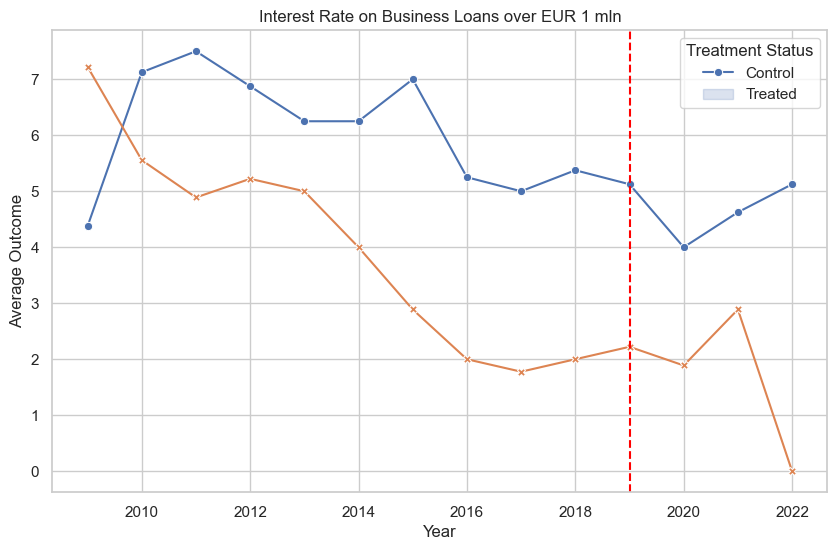

In [65]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Year', y='Interest_rate_over_Euro1M', hue='treated', style='treated', markers=True, dashes=False)

# Adding labels and title
plt.title('Interest Rate on Business Loans over EUR 1 mln')
plt.xlabel('Year')
plt.ylabel('Average Outcome')
plt.legend(title='Treatment Status', labels=['Control', 'Treated'])
plt.axvline(x=2019, color='red', linestyle='--')
plt.savefig('/Users/sonetalyn/Desktop/Thesis/Interest_Rate_Over_plot.png')
plt.show()

### Diff-in-Diff with Control Variables

In [66]:
cleaned_data['intercept'] = 1
cleaned_data['Population_Growth__Percent'] = pd.to_numeric(cleaned_data['Population_Growth__Percent'], errors='coerce')

formula = """ Interest_rate_over_Euro1M ~ treated + post_intervention + treated_intervention + Real_GDP__EURB + GDP_Per_Capita__EUR + Population__M + Population_Growth__Percent + Real_Government_Consumption_Growth__Percent + Real_Gross_Fixed_Investment_Growth__Percent + Industrial_Production_Growth__Percent + intercept"""
model = smf.ols(formula, data=cleaned_data).fit()

# Define the information to be included in the summary
info_dict = {'R-squared' : lambda x: f"{x.rsquared:.2f}",
             'No. observations' : lambda x: f"{int(x.nobs):d}"}

summary_table = summary_col([model], stars=True, info_dict=info_dict)

soup = BeautifulSoup(summary_table.as_html(), 'html.parser')

# Find the table in the parsed HTML
table = soup.find('table')

# Add a CSS style to the table tag to add a frame around the table
table['style'] = 'border: 1px solid black'

for th in table.find_all('th'):
    th['style'] = 'text-align: center'

# Create a new div element with the additional text
additional_text = soup.new_tag('div')
additional_text.string = 'Standard errors in parentheses.\n* p<.1, ** p<.05, ***p<.01'

# Write the modified HTML to a file
with open('/Users/sonetalyn/Desktop/Thesis/Controlled Interest Rate Over 1 mln EUR.html', 'w') as f:
    f.write(str(soup))

print(summary_table)


                                            Interest_rate_over_Euro1M
---------------------------------------------------------------------
Intercept                                   3.3032***                
                                            (0.3345)                 
treated                                     -0.9210                  
                                            (0.6396)                 
post_intervention                           -0.8131                  
                                            (0.8055)                 
treated_intervention                        -0.6269                  
                                            (1.1052)                 
Real_GDP__EURB                              -0.0112***               
                                            (0.0038)                 
GDP_Per_Capita__EUR                         -0.0001**                
                                            (0.0001)                 
Population__M      

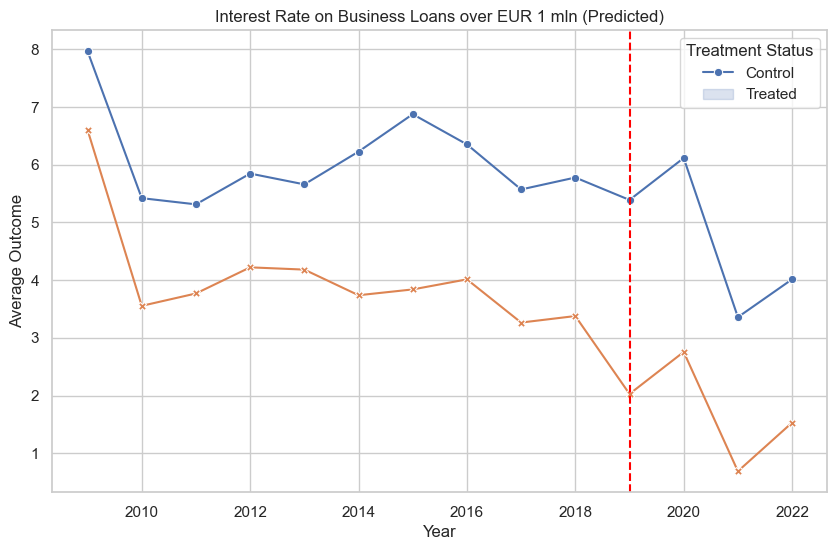

In [67]:
# Fit the model
model = smf.ols(formula, data=cleaned_data).fit()

# Generate predicted values
cleaned_data['predicted'] = model.predict(cleaned_data)

# Group the data by 'Year' and 'treated', and calculate the mean of 'predicted'
grouped_data = cleaned_data.groupby(['Year', 'treated'])['predicted'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Year', y='predicted', hue='treated', style='treated', markers=True, dashes=False)

# Adding labels and title
plt.title('Interest Rate on Business Loans over EUR 1 mln (Predicted)')
plt.xlabel('Year')
plt.ylabel('Average Outcome')
plt.legend(title='Treatment Status', labels=['Control', 'Treated'])
plt.axvline(x=2019, color='red', linestyle='--')

# Save the plot
plt.savefig('/Users/sonetalyn/Desktop/Thesis/Interest_Rate_Over_predicted_plot.png')

# Show the plot
plt.show()

### Fixed Effects for Country and a Year

In [68]:
formula = 'Interest_rate_over_Euro1M ~ treated + post_intervention + treated_intervention + C(Country) + C(Year)'
model = smf.ols(formula, data=cleaned_data).fit()

In [69]:
from bs4 import BeautifulSoup
from statsmodels.iolib.summary2 import summary_col
import statsmodels.formula.api as smf


formula = 'Interest_rate_over_Euro1M ~ treated + post_intervention + treated_intervention + C(Country) + C(Year)'
model = smf.ols(formula, data=cleaned_data).fit()

info_dict = {'R-squared' : lambda x: f"{x.rsquared:.2f}",
             'No. observations' : lambda x: f"{int(x.nobs):d}"}

summary_table = summary_col([model], stars=True, info_dict=info_dict)

soup = BeautifulSoup(summary_table.as_html(), 'html.parser')

table = soup.find('table')

table['style'] = 'border: 1px solid black'

for th in table.find_all('th'):
    th['style'] = 'text-align: center'

additional_text = soup.new_tag('div')
additional_text.string = 'Standard errors in parentheses.\n* p<.1, ** p<.05, ***p<.01'

with open('/Users/sonetalyn/Desktop/Thesis/Interest Rate Over 1 mln EUR with Fixed Effects.html', 'w') as f:
    f.write(str(soup))

print(summary_table)


                              Interest_rate_over_Euro1M
-------------------------------------------------------
Intercept                     1.2593                   
                              (0.8910)                 
C(Country)[T.Bosnia]          1.9286**                 
                              (0.9415)                 
C(Country)[T.Bulgaria]        2.1121***                
                              (0.6319)                 
C(Country)[T.Czechia]         1.7857*                  
                              (0.9415)                 
C(Country)[T.Estonia]         -0.7450                  
                              (0.6319)                 
C(Country)[T.Georgia]         9.6429***                
                              (0.9415)                 
C(Country)[T.Hungary]         -0.0307                  
                              (0.6319)                 
C(Country)[T.Latvia]          -0.3879                  
                              (0.6319)         

### Fixed Effects with Control Variables

In [70]:
formula = 'Interest_rate_over_Euro1M ~ treated + post_intervention + treated_intervention + C(Country) + C(Year) + Real_GDP__EURB + GDP_Per_Capita__EUR + Population__M + Population_Growth__Percent + Real_Government_Consumption_Growth__Percent + Real_Gross_Fixed_Investment_Growth__Percent + Industrial_Production_Growth__Percent'
model = smf.ols(formula, data=cleaned_data).fit()

info_dict = {'R-squared' : lambda x: f"{x.rsquared:.2f}",
             'No. observations' : lambda x: f"{int(x.nobs):d}"}

summary_table = summary_col([model], stars=True, info_dict=info_dict)

soup = BeautifulSoup(summary_table.as_html(), 'html.parser')

table = soup.find('table')

table['style'] = 'border: 1px solid black'

for th in table.find_all('th'):
    th['style'] = 'text-align: center'

additional_text = soup.new_tag('div')
additional_text.string = 'Standard errors in parentheses.\n* p<.1, ** p<.05, ***p<.01'

with open('/Users/sonetalyn/Desktop/Thesis/Interest Rate Over 1 mln EUR with Fixed Effects and Controls.html', 'w') as f:
    f.write(str(soup))

print(summary_table)


                                            Interest_rate_over_Euro1M
---------------------------------------------------------------------
Intercept                                   1.7833*                  
                                            (1.0778)                 
C(Country)[T.Bosnia]                        1.9530**                 
                                            (0.9015)                 
C(Country)[T.Bulgaria]                      0.9127                   
                                            (1.0430)                 
C(Country)[T.Czechia]                       6.2848**                 
                                            (2.6417)                 
C(Country)[T.Estonia]                       -5.9987***               
                                            (2.0839)                 
C(Country)[T.Georgia]                       9.0866***                
                                            (0.9178)                 
C(Country)[T.Hungar

## Combined Models

In [73]:
formulas = [
    'Interest_rate_over_Euro1M ~ treated + post_intervention + treated_intervention',
    'Interest_rate_over_Euro1M ~ treated + post_intervention + treated_intervention + Real_GDP__EURB + GDP_Per_Capita__EUR + Real_Private_Consumption_Growth__Percent + Real_Government_Consumption_Growth__Percent + Real_Gross_Fixed_Investment_Growth__Percent + Industrial_Production_Growth__Percent + Population__M + Population_Growth__Percent + intercept',
    'Interest_rate_over_Euro1M ~ treated + post_intervention + treated_intervention + C(Year) + C(Country)',
    'Interest_rate_over_Euro1M ~ treated + post_intervention + treated_intervention + C(Year) + C(Country) + Real_GDP__EURB + GDP_Per_Capita__EUR + Real_Private_Consumption_Growth__Percent + Real_Government_Consumption_Growth__Percent + Real_Gross_Fixed_Investment_Growth__Percent + Industrial_Production_Growth__Percent + Population__M + Population_Growth__Percent'
]

models = [smf.ols(formula, data=cleaned_data).fit() for formula in formulas]

info_dict = {'R-squared' : lambda x: f"{x.rsquared:.2f}",
             'No. observations' : lambda x: f"{int(x.nobs):d}"}

summary_table = summary_col(models, stars=True, info_dict=info_dict)

soup = BeautifulSoup(summary_table.as_html(), 'html.parser')

table = soup.find('table')

table['style'] = 'border: 1px solid black'

for th in table.find_all('th'):
    th['style'] = 'text-align: center'

additional_text = soup.new_tag('div')
additional_text.string = 'Standard errors in parentheses.\n* p<.1, ** p<.05, ***p<.01'

soup.append(additional_text)

with open('/Users/sonetalyn/Desktop/Thesis/Combined_Interest_Rate_Big_Summary.html', 'w') as f:
    f.write(str(soup))

print(summary_table)


                                            Interest_rate_over_Euro1M I Interest_rate_over_Euro1M II Interest_rate_over_Euro1M III Interest_rate_over_Euro1M IIII
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
C(Country)[T.Bosnia]                                                                                 1.9286**                      1.9507**                      
                                                                                                     (0.9415)                      (0.8979)                      
C(Country)[T.Bulgaria]                                                                               2.1121***                     1.0823                        
                                                                                                     (0.6319)                      (1.0443)                      
C(Country)[T.Czechia]      